In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [16]:
data = pd.read_csv("./data/trainingdataset.csv")
print(data)

         A
0    33.46
1     1.16
2    23.54
3    16.92
4    91.24
..     ...
495  51.38
496  98.12
497  96.89
498  47.91
499  92.88

[500 rows x 1 columns]


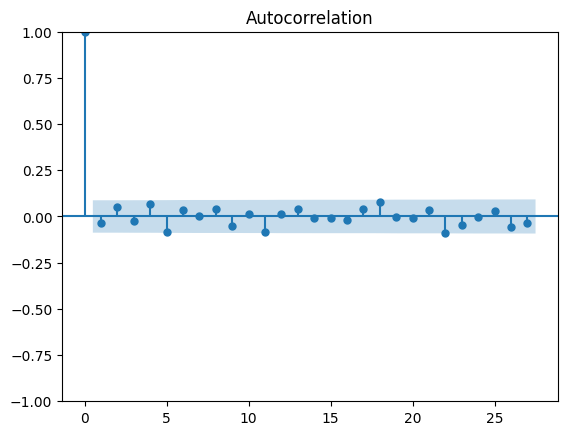

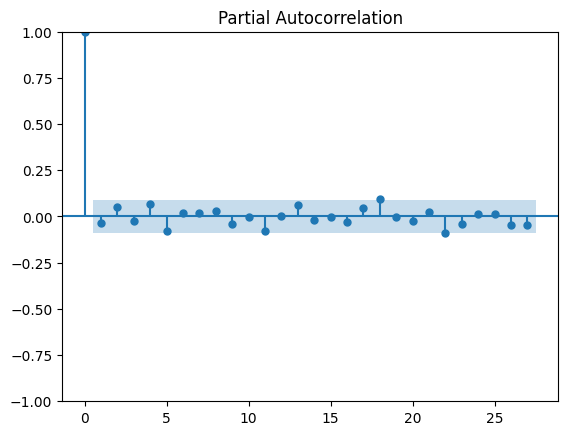

In [17]:
# a) Identify ARIMA Order (p, d, q)
plot_acf(data)
plot_pacf(data)
plt.show()  # Visually inspect the plots to determine p, d, q

In [18]:
# creating training and test data set
size = int(len(data) * 0.8)
trainData, testData = data[0:size], data[size: len(data)]
print(trainData, testData)

         A
0    33.46
1     1.16
2    23.54
3    16.92
4    91.24
..     ...
395  94.33
396  84.70
397  30.66
398  81.98
399  58.96

[400 rows x 1 columns]          A
400  64.97
401  15.05
402  58.10
403  76.30
404  16.86
..     ...
495  51.38
496  98.12
497  96.89
498  47.91
499  92.88

[100 rows x 1 columns]


In [19]:
# b) Model estimation
# Replace with identified order based on ACF/PACF analysis
model = ARIMA(trainData, order=(1, 2, 3))  # Example order, adjust based on your analysis
modelFit = model.fit()
print(modelFit.summary())

c:\Users\Fahim Ahammed Firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      A   No. Observations:                  400
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -1911.772
Date:                Wed, 10 Jan 2024   AIC                           3833.543
Time:                        16:38:42   BIC                           3853.475
Sample:                             0   HQIC                          3841.438
                                - 400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9907      0.031    -32.130      0.000      -1.051      -0.930
ma.L1         -0.9989      4.462     -0.224      0.823      -9.745       7.747
ma.L2         -0.9999      8.916     -0.112      0.9

In [20]:
# c) Model evaluation (assuming you have a test set)
forecast = modelFit.forecast(steps=len(testData))
mse = mean_squared_error(testData, forecast)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 859.8009040314432
RMSE: 29.322361842652498


In [21]:
# d) Forecasting
forecast = pd.Series(forecast, index=testData.index)  # Assuming you want the index to match the last n_periods_to_forecast of the original data
print(forecast)

400    55.955134
401    52.525719
402    55.932105
403    52.566544
404    55.909673
         ...    
495    53.952623
496    55.365082
497    53.974823
498    55.361101
499    53.996779
Name: predicted_mean, Length: 100, dtype: float64


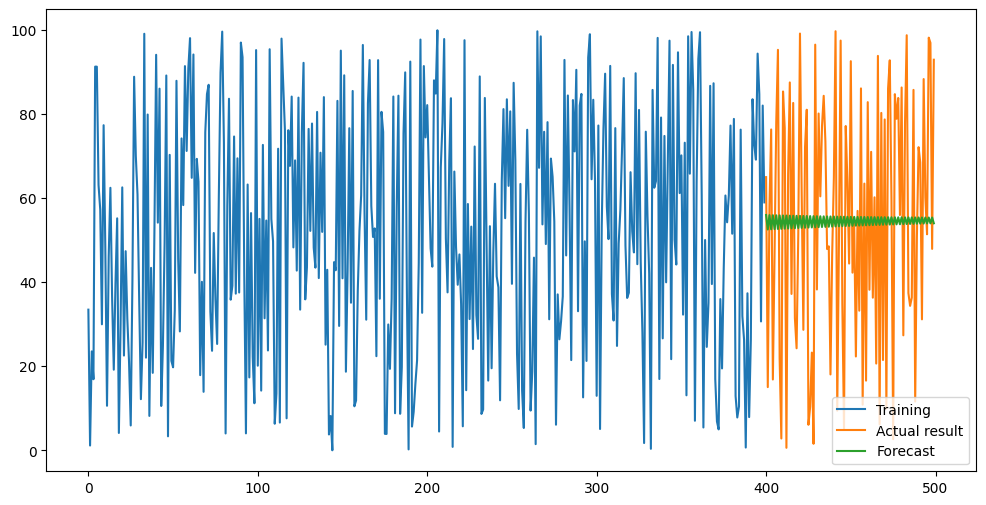

In [22]:
# Visualization with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(trainData, label="Training")
plt.plot(testData, label="Actual result")
plt.plot(forecast, label="Forecast")
plt.legend()
plt.show()